<a href="https://colab.research.google.com/github/totheBrenda/portfolio/blob/main/p003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Code States AI Bootcamp 03 / Section 6 : Project**
- Project Presenter : 백지희 (JeeHee Brenda BAEK)

- Subject : Correlation between staying at home and COVID-19

- Goal: Improving EDA ability using data frames.

- Source : https://kdx.kr/data/view/6972, https://kdx.kr/data/view/25918


In [ ]:
## Load data set
import pandas as pd
data1 = pd.read_csv('/content/data1.csv')
data2 = pd.read_csv('/content/data2.csv')

## Explore data set / Feature engineering

feature report - data1

     'dt'               Start date of the week
     'age_cd'           Age group
     'sex_cd'           Sex
     'home_sido_nm'     Region
     'h0d0h0_dur_r'     Time spent at least 1.5km away from the estimated residence (0~1)
                        On weekdays, 18 ~ 24, 0 ~ 9
     'h0d0h1_dur_r'     Time spent less than 1.5 km from the estimated residence (0-1)
                        On weekdays, 18 ~ 24, 0 ~ 9
     'h0d1h0_dur_r'     Time spent at least 1.5km away from the estimated residence (0~1)
                        On weekdays, 09 ~ 18
     'h0d1h1_dur_r'     Time spent less than 1.5 km from the estimated residence (0-1)
                        On weekdays, 09 ~ 18
     'h1d0h0_dur_r'     Time spent at least 1.5km away from the estimated residence (0~1)
                        On holidays (Saturday/Sunday/Holiday), 18 ~ 24, 0 ~ 9
     'h1d0h1_dur_r'     Time spent less than 1.5 km from the estimated residence (0-1)
                        On holidays (Saturday/Sunday/Holiday), 18 ~ 24, 0 ~ 9
     'h1d1h0_dur_r'     Time spent at least 1.5km away from the estimated residence (0~1)
                        On holidays (Saturday/Sunday/Holiday), 09 ~ 18
     'h1d1h1_dur_r'     Time spent less than 1.5 km from the estimated residence (0-1)
                        On holidays (Saturday/Sunday/Holiday), 09 ~ 18

feature report - data2

     'seq'              Index
     'stdDay'           Date
     'gubun'            Region
     'gubunCn'          Region(Chinese)
     'gubunEn'          Region(English)
     'deathCnt'         Deaths reported
     'incDec'           Increase or decrease
     'isolClearCnt'     Isolation release
     'qurRate'          Rate per 100,000
     'defCnt'           Total confirmed
     'isolIngCnt'       Patients in isolation
     'overFlowCnt'      Foreign inflows
     'localOccCnt'      Regional outbreaks
     'createDt'         Registration date
     'updateDt          Modification date

In [ ]:
## data1 - Select the data columns to be used
data1_sel_col = data1[['dt', 'home_sido_nm', 'h0d1h1_dur_r', 'h0d0h1_dur_r', 'h1d1h1_dur_r', 'h1d0h1_dur_r']]
data1_sel_col.columns = ['date','region', 'wday_day', 'wday_night', 'wend_day', 'wend_night']
data1_sel_col.head()

,date,region,wday_day,wday_night,wend_day,wend_night
0,20200831,NaN,0.896114,0.929820,0.828354,0.869077
1,20200831,NaN,0.843748,0.920836,0.857087,0.905624
2,20200831,NaN,0.623336,0.827400,0.719763,0.799579
3,20200831,NaN,0.519444,0.834887,0.699587,0.816935
4,20200831,NaN,0.507824,0.846063,0.704121,0.847899


In [ ]:
## data1 - Select only data with regional information
data1_sel_region = data1_sel_col.dropna(subset=['region'])
data1_sel_region.info()
data1_sel_region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 11 to 1567
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        952 non-null    int64  
 1   region      952 non-null    object 
 2   wday_day    952 non-null    float64
 3   wday_night  952 non-null    float64
 4   wend_day    952 non-null    float64
 5   wend_night  952 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 52.1+ KB


,date,region,wday_day,wday_night,wend_day,wend_night
11,20200831,광주광역시,0.596144,0.856152,0.715476,0.848471
12,20200831,서울특별시,0.618504,0.875883,0.755232,0.867520
13,20200831,대구광역시,0.592556,0.865421,0.719722,0.860805
14,20200831,강원도,0.645514,0.856725,0.714623,0.842408
15,20200831,전라남도,0.613115,0.840657,0.706206,0.832672


In [ ]:
## data2 - Select the data columns to be used
data2_sel_col = data2[['stdDay', 'gubun', 'localOccCnt']]
data2_sel_col.columns = ['date', 'region', 'local']
data2_sel_col.head()

,date,region,local
0,2020년 3월 1일 16시,합계,NaN
1,2020년 3월 1일 16시,서울,NaN
2,2020년 3월 1일 16시,부산,NaN
3,2020년 3월 1일 16시,대구,NaN
4,2020년 3월 1일 16시,인천,NaN


In [ ]:
## data2 - Delete data not needed for analysis
data2_sel_region = data2_sel_col[(data2_sel_col.region != '검역') & (data2_sel_col.region != '합계')]
data2_sel_region.info()
data2_sel_region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 1 to 11500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    10302 non-null  object 
 1   region  10302 non-null  object 
 2   local   7039 non-null   float64
dtypes: float64(1), object(2)
memory usage: 321.9+ KB


,date,region,local
1,2020년 3월 1일 16시,서울,NaN
2,2020년 3월 1일 16시,부산,NaN
3,2020년 3월 1일 16시,대구,NaN
4,2020년 3월 1일 16시,인천,NaN
5,2020년 3월 1일 16시,광주,NaN


In [ ]:
## data1 - Match 'region' to data2
def reg(x) :
  dic = {'서울특별시' : '서울', '인천광역시' : '인천', '대전광역시' : '대전', '대구광역시' : '대구',
         '부산광역시' : '부산', '울산광역시' : '울산', '광주광역시' : '광주',
         '제주특별자치도' : '제주', '세종특별자치시' : '세종' , '경기도' :  '경기',
         '강원도' :  '강원', '충청남도' :  '충남', '충청북도' :  '충북', '경상남도' :  '경남',
         '경상북도' :  '경북', '전라남도' :  '전남', '전라북도' :  '전북'}
  return dic[x]

data1_sel_region['region'] = data1_sel_region['region'].apply(reg)
data1_sel_region['region'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


광주    56
전남    56
인천    56
경북    56
경남    56
전북    56
울산    56
충북    56
강원    56
대구    56
제주    56
대전    56
세종    56
부산    56
경기    56
충남    56
서울    56
Name: region, dtype: int64

In [ ]:
## data1 - Refine date data
from datetime import datetime
def date1(intdate) :
  s = str(intdate)
  return datetime.strptime(s, '%Y%m%d').strftime('%Y/%m/%d')
data1_sel_region['date'] = data1_sel_region['date'].apply(date1)
data1_sel_region['date'] = pd.to_datetime(data1_sel_region['date'])
data1_sel_region.info()
print(data1_sel_region['date'].describe())
data1_sel_region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 11 to 1567
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        952 non-null    datetime64[ns]
 1   region      952 non-null    object        
 2   wday_day    952 non-null    float64       
 3   wday_night  952 non-null    float64       
 4   wend_day    952 non-null    float64       
 5   wend_night  952 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 52.1+ KB
count                     952
unique                     56
top       2021-06-21 00:00:00
freq                       17
first     2020-08-31 00:00:00
last      2021-09-20 00:00:00
Name: date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and 

,date,region,wday_day,wday_night,wend_day,wend_night
11,2020-08-31,광주,0.596144,0.856152,0.715476,0.848471
12,2020-08-31,서울,0.618504,0.875883,0.755232,0.867520
13,2020-08-31,대구,0.592556,0.865421,0.719722,0.860805
14,2020-08-31,강원,0.645514,0.856725,0.714623,0.842408
15,2020-08-31,전남,0.613115,0.840657,0.706206,0.832672


In [ ]:
## data1 - Date data check
data1_sel_region['date'].unique()

array(['2020-08-31T00:00:00.000000000', '2020-09-07T00:00:00.000000000',
       '2020-09-14T00:00:00.000000000', '2020-09-21T00:00:00.000000000',
       '2020-09-28T00:00:00.000000000', '2020-10-05T00:00:00.000000000',
       '2020-10-12T00:00:00.000000000', '2020-10-19T00:00:00.000000000',
       '2020-10-26T00:00:00.000000000', '2020-11-02T00:00:00.000000000',
       '2020-11-09T00:00:00.000000000', '2020-11-16T00:00:00.000000000',
       '2020-11-23T00:00:00.000000000', '2020-11-30T00:00:00.000000000',
       '2020-12-07T00:00:00.000000000', '2020-12-14T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-11T00:00:00.000000000',
       '2021-01-18T00:00:00.000000000', '2021-01-25T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-02-08T00:00:00.000000000',
       '2021-02-15T00:00:00.000000000', '2021-02-22T00:00:00.000000000',
       '2021-03-01T00:00:00.000000000', '2021-03-08

In [ ]:
## data2 - Refine date data
def date2(strdate) :
  s1 = strdate.split(' ')
  s2 = s1[0][:-1] + s1[1][:-1] + s1[2][:-1]
  return datetime.strptime(s2, '%Y%m%d').strftime('%Y/%m/%d')
data2_sel_region['date'] = data2_sel_region['date'].apply(date2)
data2_sel_region['date'] = pd.to_datetime(data2_sel_region['date'])
data2_sel_region.info()
print(data2_sel_region['date'].describe())
data2_sel_region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10302 entries, 1 to 11500
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10302 non-null  datetime64[ns]
 1   region  10302 non-null  object        
 2   local   7039 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 321.9+ KB
count                   10302
unique                    577
top       2020-04-12 00:00:00
freq                       68
first     2020-03-01 00:00:00
last      2021-10-02 00:00:00
Name: date, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and 

,date,region,local
1,2020-03-01,서울,NaN
2,2020-03-01,부산,NaN
3,2020-03-01,대구,NaN
4,2020-03-01,인천,NaN
5,2020-03-01,광주,NaN


In [ ]:
## data2 - Select range matching data1
data2_sel_date = data2_sel_region[('20200824' < data2_sel_region['date']) & (data2_sel_region['date'] < '20210921')]
data2_sel_date.info()
data2_sel_date['date'].describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6953 entries, 3504 to 11272
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6953 non-null   datetime64[ns]
 1   region  6953 non-null   object        
 2   local   6085 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 217.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                    6953
unique                    391
top       2021-08-05 00:00:00
freq                       34
first     2020-08-25 00:00:00
last      2021-09-20 00:00:00
Name: date, dtype: object

In [ ]:
## data1 - Separate data1 by date
data1_slice = [g.reset_index() for n, g in data1_sel_region.set_index('date').groupby(pd.Grouper(freq='7D'))]
data1_slice[0]

,date,region,wday_day,wday_night,wend_day,wend_night
0,2020-08-31,광주,0.596144,0.856152,0.715476,0.848471
1,2020-08-31,서울,0.618504,0.875883,0.755232,0.867520
2,2020-08-31,대구,0.592556,0.865421,0.719722,0.860805
3,2020-08-31,강원,0.645514,0.856725,0.714623,0.842408
4,2020-08-31,전남,0.613115,0.840657,0.706206,0.832672
5,2020-08-31,전북,0.594091,0.845613,0.692492,0.833776
6,2020-08-31,울산,0.587152,0.835610,0.709261,0.837633
7,2020-08-31,세종,0.565088,0.834683,0.671438,0.794033
8,2020-08-31,충남,0.585500,0.841232,0.687294,0.824409
9,2020-08-31,경남,0.587633,0.846552,0.712418,0.845127


In [ ]:
## df - Merge data1 and data2
df = pd.DataFrame()
cnt = 0

for n, g in data2_sel_date.set_index('date').groupby(pd.Grouper(freq='7D')) :
  grouped = g.groupby(['region']).sum().reset_index()
  merged = pd.merge(data1_slice[cnt], grouped, how='right', on='region')
  
  df = pd.concat([df, merged]).reset_index(drop=True)
  cnt = cnt + 1

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        952 non-null    datetime64[ns]
 1   region      952 non-null    object        
 2   wday_day    952 non-null    float64       
 3   wday_night  952 non-null    float64       
 4   wend_day    952 non-null    float64       
 5   wend_night  952 non-null    float64       
 6   local       952 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 52.2+ KB


,date,region,wday_day,wday_night,wend_day,wend_night,local
0,2020-08-31,강원,0.645514,0.856725,0.714623,0.842408,48.0
1,2020-08-31,경기,0.590292,0.861103,0.726282,0.851184,623.0
2,2020-08-31,경남,0.587633,0.846552,0.712418,0.845127,37.0
3,2020-08-31,경북,0.596796,0.838426,0.687412,0.827312,9.0
4,2020-08-31,광주,0.596144,0.856152,0.715476,0.848471,92.0
...,...,...,...,...,...,...,...
947,2021-09-20,전남,0.559379,0.798702,0.649936,0.781312,50.0
948,2021-09-20,전북,0.580683,0.850925,0.660611,0.796716,220.0
949,2021-09-20,제주,0.553922,0.831887,0.618621,0.799195,55.0
950,2021-09-20,충남,0.568114,0.836158,0.636360,0.764933,384.0


## Analysis

In [ ]:
## Graph
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

def grp(region) :
  df_region = df[df['region'] == region]

  fig, ax = plt.subplots(figsize=(20, 7))
  par = ax.twinx()

  ax.plot(df_region['date'], 1-df_region['wday_day'], label = 'wday_day', marker = 'o', markersize = 10, color = 'lightgray')
  ax.plot(df_region['date'], 1-df_region['wday_night'], label = 'wday_night', marker = 'o', markersize = 10, color = 'lightsalmon')
  ax.plot(df_region['date'], 1-df_region['wend_day'], label = 'wend_day', marker = 'o', markersize = 10, color = 'burlywood')
  ax.plot(df_region['date'], 1-df_region['wend_night'], label = 'wend_night', marker = 'o', markersize = 10, color = 'lightblue')
  par.plot(df_region['date'], df_region['local'], label = 'Confirmed', marker='o', markersize=10, color = 'red')

  dateFmt = mdates.DateFormatter('%Y-%m-%d')
  ax.xaxis.set_major_formatter(dateFmt)
  plt.xticks(rotation=45)

  ax.legend()
  par.legend()

  ax.set_xlabel('Date')
  ax.set_ylabel('Rate of going out')
  par.set_ylabel('Confirmed')

  plt.show();

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


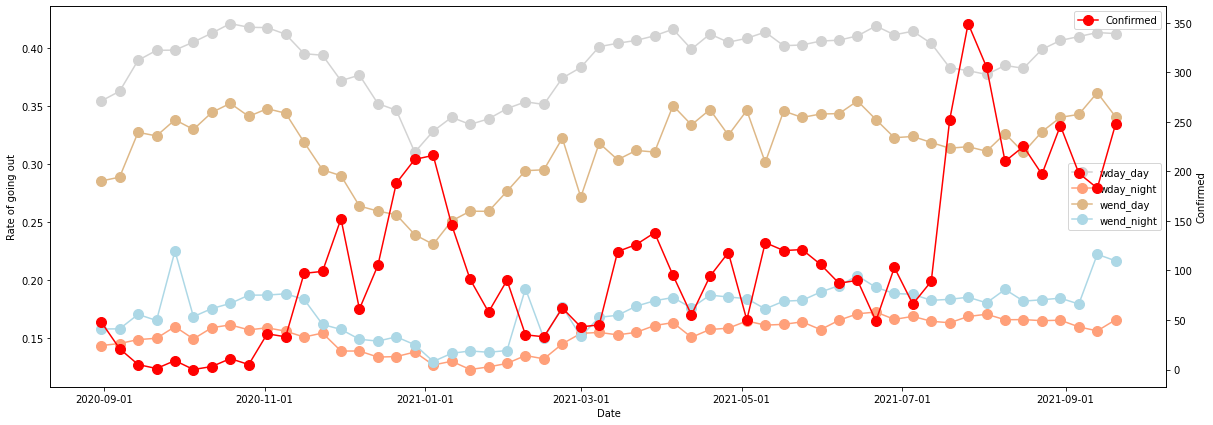

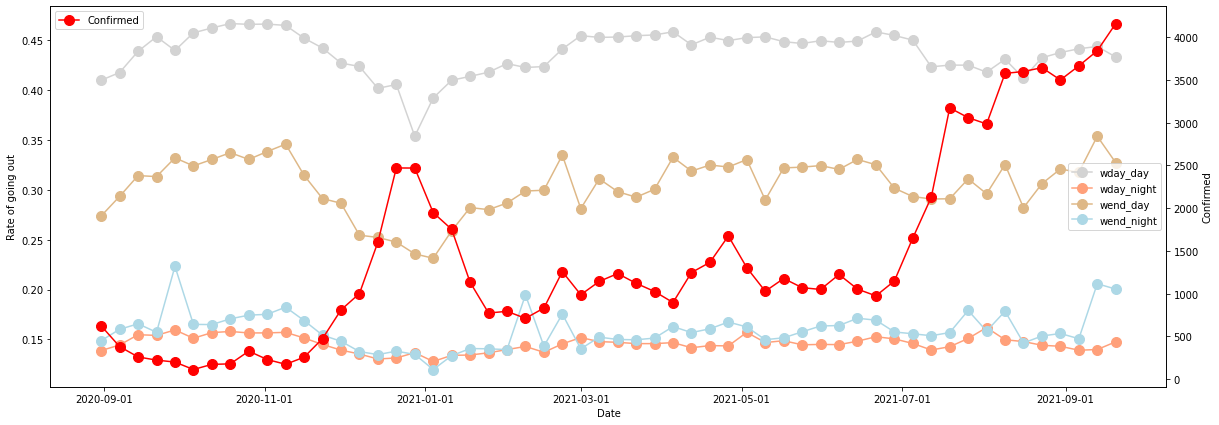

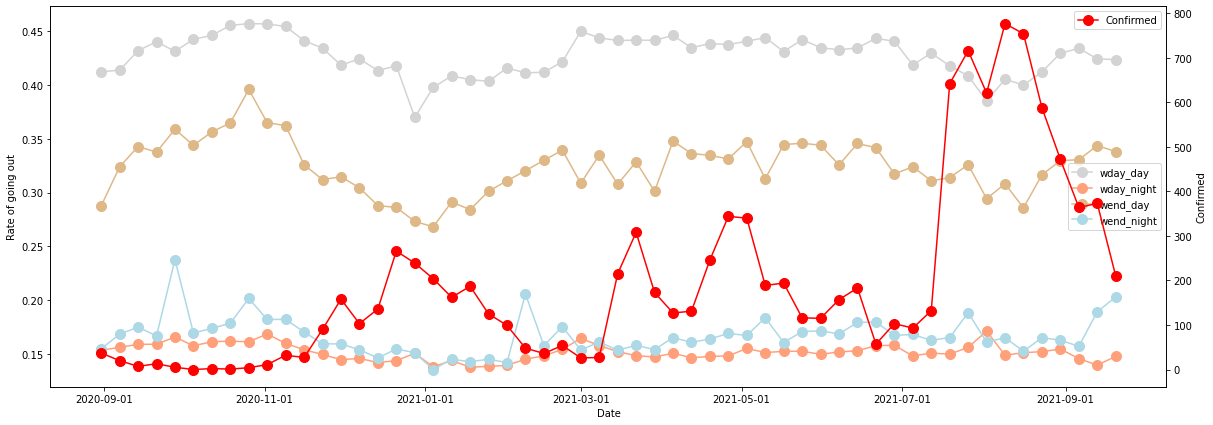

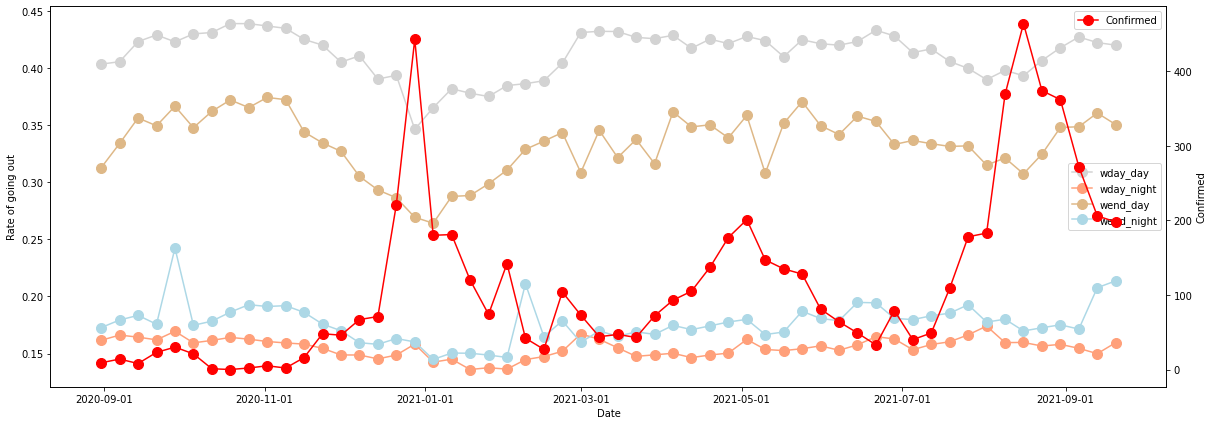

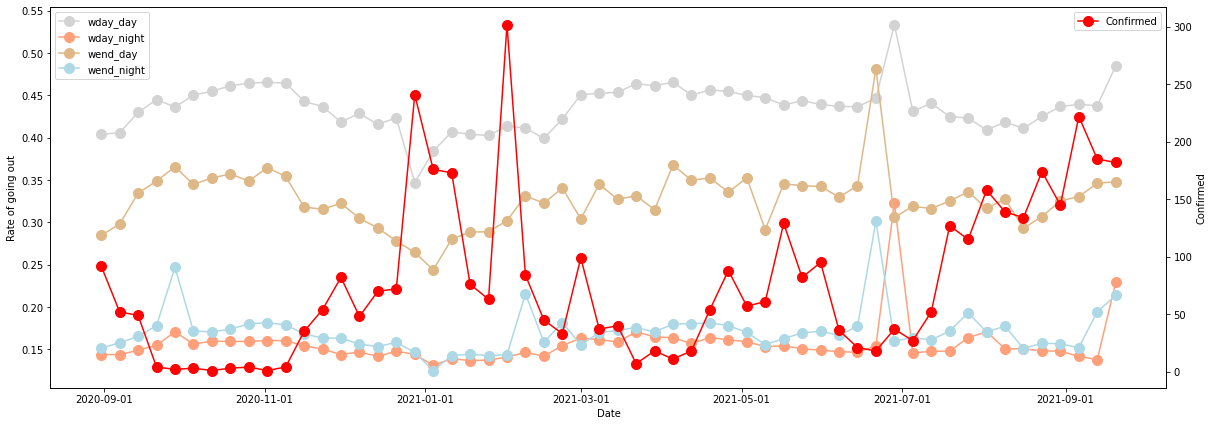

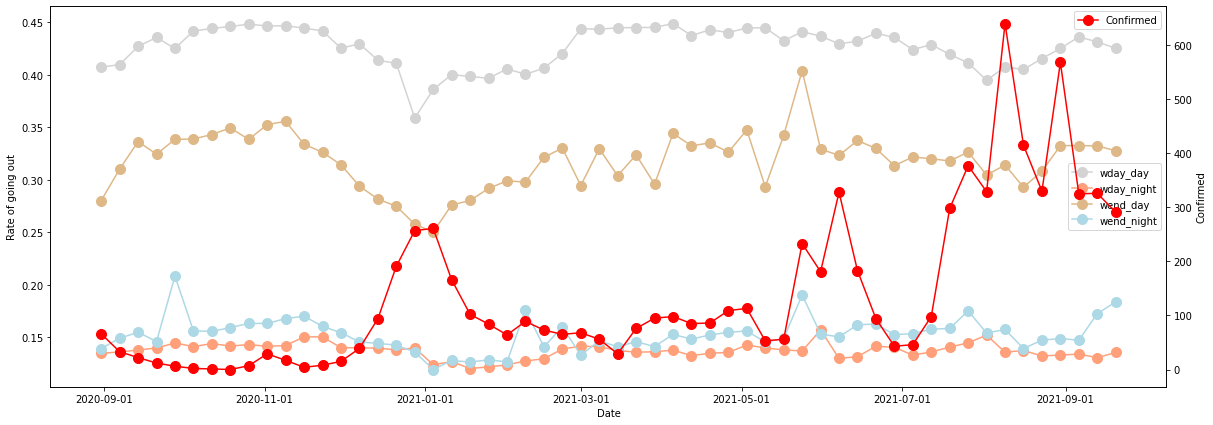

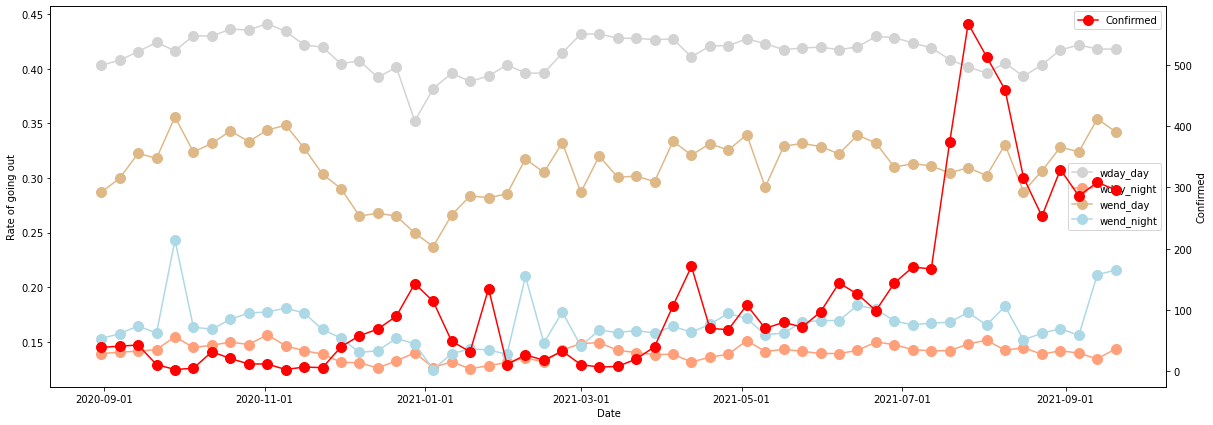

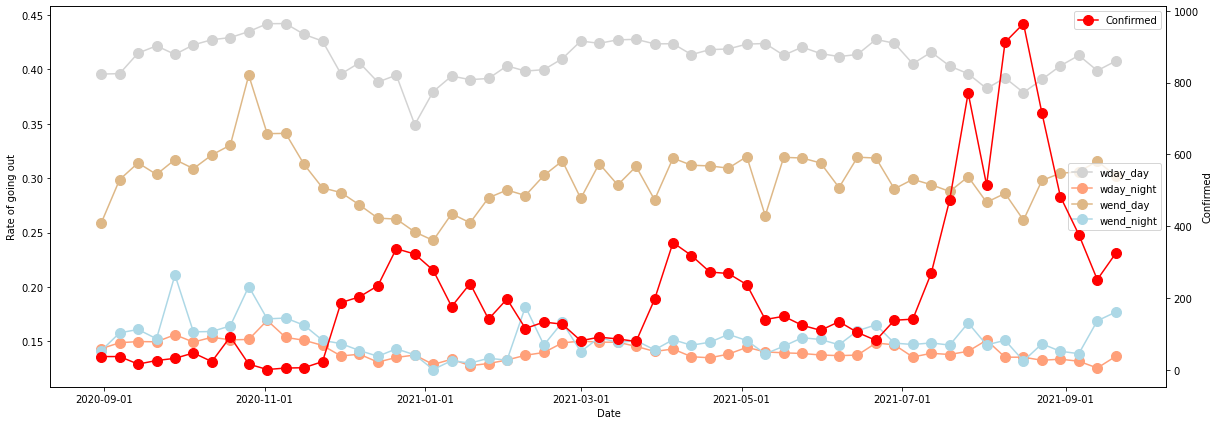

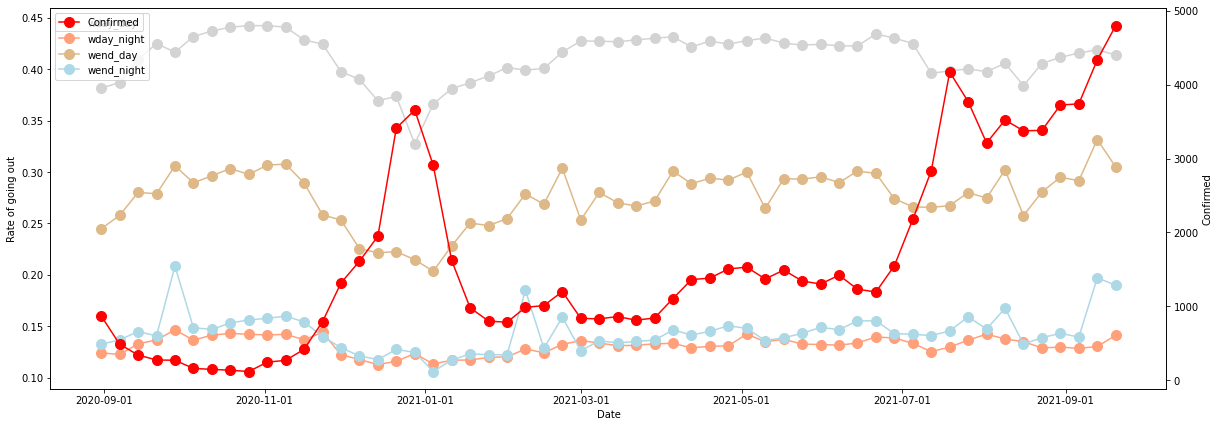

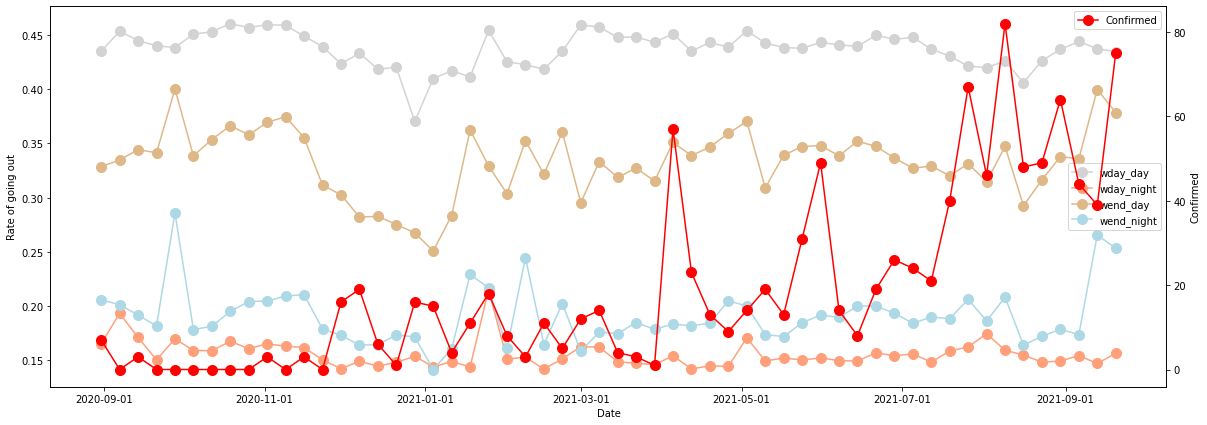

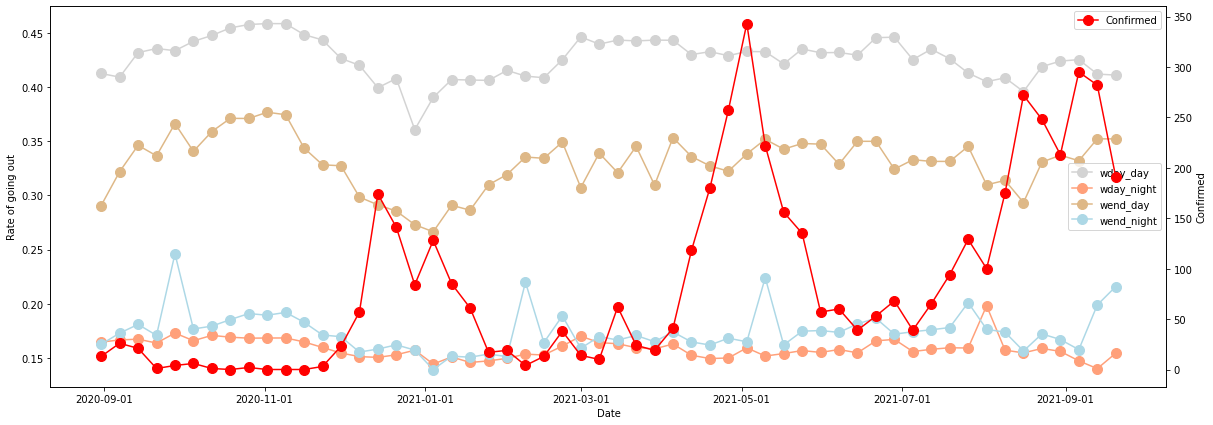

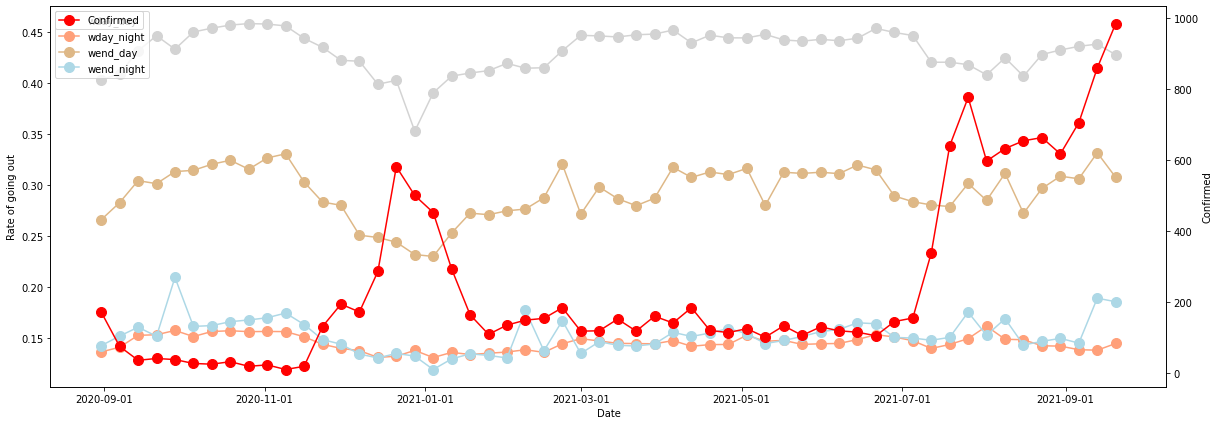

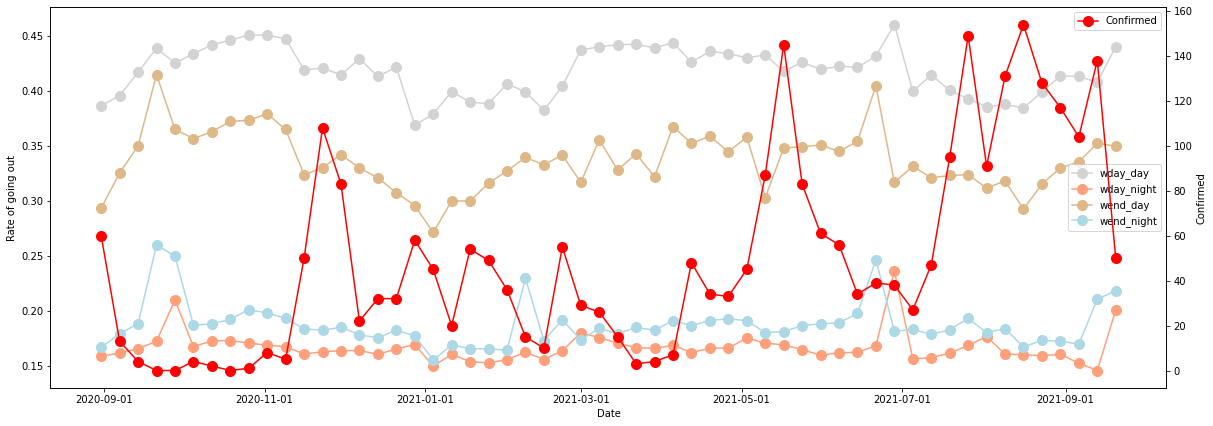

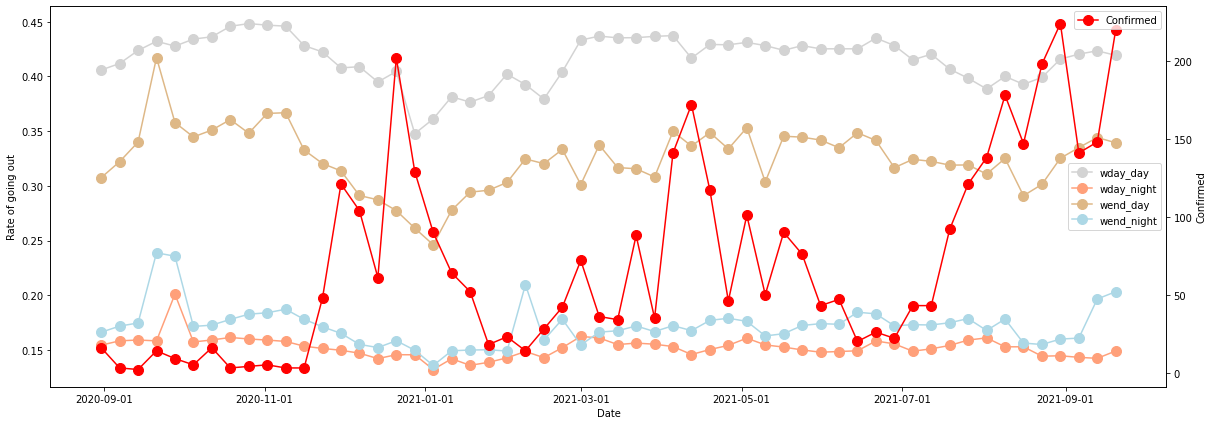

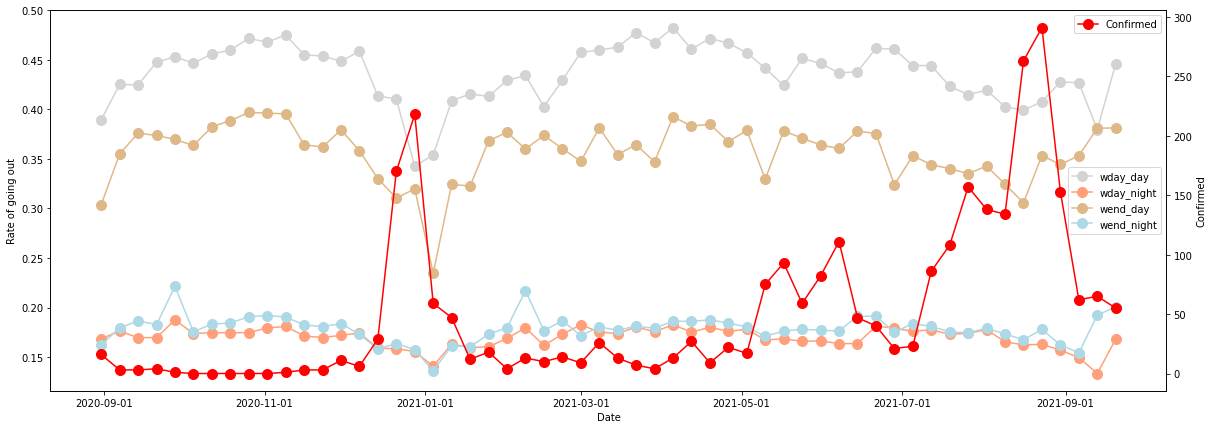

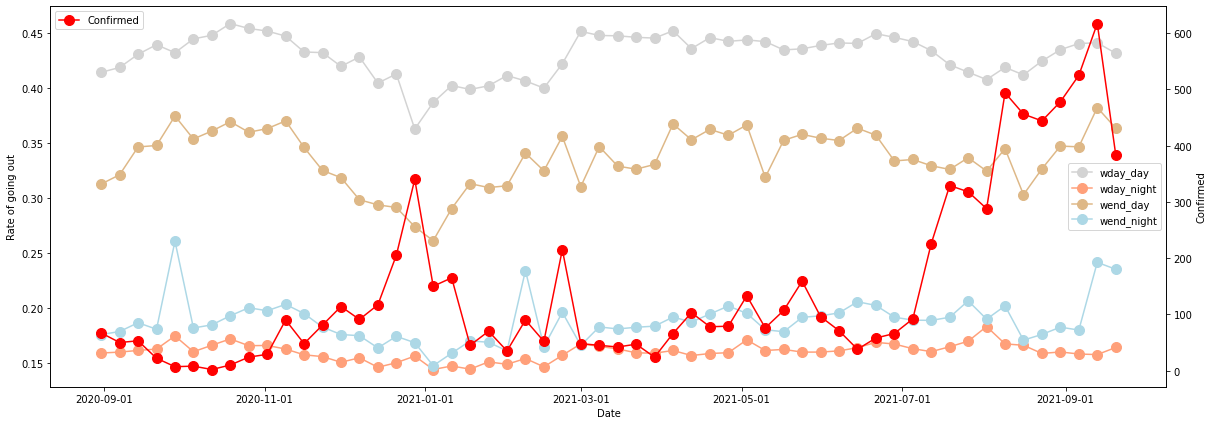

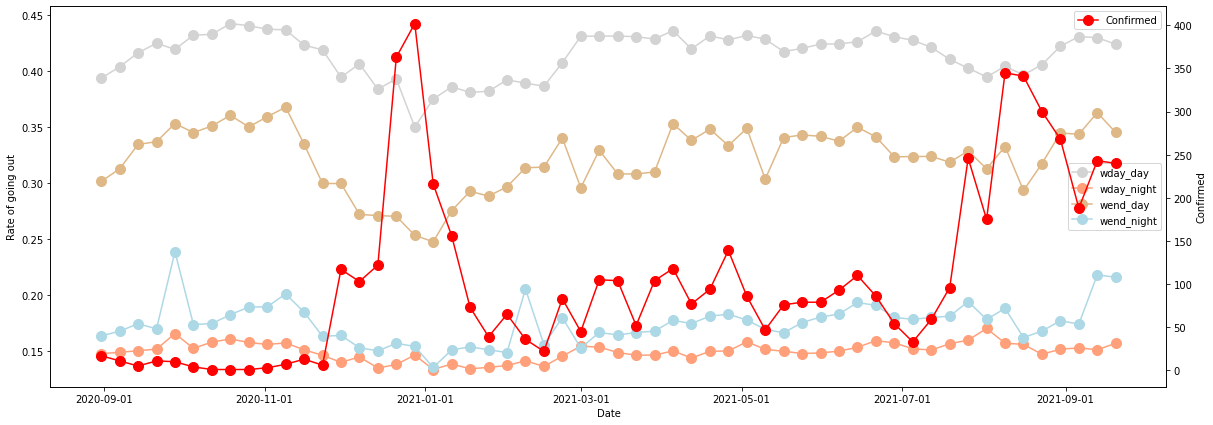

In [ ]:
## Select the region to analyze
print(df['region'].unique())
for region in df['region'].unique() :
  grp(region)

In [ ]:
## LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

feature = ['wday_day', 'wday_night', 'wend_day', 'wend_night']
target = 'local'

## Overall data analysis
model.fit(df[feature]*100, df[target])
print('전국 : ', model.coef_, model.intercept_)
print('-'*100)

## Regional data analysis
def coe_int(region) :
    df_region = df[df['region'] == region]
    model.fit(df_region[feature]*100, df_region[target])

for reg in df['region'].unique() :
  coe_int(reg)
  print(reg, ': ', model.coef_, model.intercept_)

전국 :  [-47.17032181 106.76495137  80.17363108 -46.44751235] -7645.185180912628
----------------------------------------------------------------------------------------------------
강원 :  [ 24.7180162  -62.77057092  10.17476941  -9.4896075 ] 3999.129396054874
경기 :  [ 382.8487067   265.6957977  -251.08416568   24.20637902] -27361.03674245743
경남 :  [ 53.33609106 -15.02325074   0.75518517  -0.13550299] -1624.8899101048253
경북 :  [ 26.99931693 -28.74696176   2.69220022   2.8783871 ] 540.2228273380025
광주 :  [16.49625263 -8.84490184  0.36296513  3.88803079] -454.082329249124
대구 :  [ 43.37454807   6.67811176 -13.97105445  -4.05119664] -1630.7868543006857
대전 :  [ 61.18919075 -62.97881601 -21.20629703   5.48711598] 2946.6655871612506
부산 :  [ 68.55346866  44.81912039 -20.25804979  16.89178284] -7685.200269224743
서울 :  [ 554.4556019  -155.17881119 -283.64448862   21.12159058] 1247.0177339333559
세종 :  [ 6.14877761 -1.85589705 -3.27832611  1.92145438] -107.0358081063397
울산 :  [17.79303116 33.63642182 

In [ ]:
## Interact demonstration
from ipywidgets import interact
region = '경기'
coe_int(region)

@interact
def explain_prediction(wday_day=(0, 100), wday_night=(0, 100), wend_day=(0, 100), wend_night=(0, 100)):
    y_pred = model.predict([[wday_day, wday_night, wend_day, wend_night]])
    pred = f"""
    
    \"{region}\" 지역 자택 주변 체류 비율에 따른 코로나 확진자 증감 예측
    - 평일 낮 자택 주변 체류 비율 : {wday_day} %,
    - 평일 저녁 자택 주변 체류 비율 : {wday_night} %,
    - 주말 낮 자택 주변 체류 비율 : {wend_day} %,
    - 주말 저녁 자택 주변 체류 비율 : {wend_night} % 일 때,

    확진자는 {y_pred[0]} 명으로 예측 됨.
    * 각 항목이 1% 증가할 때마다 추가 확진자는
    {model.coef_} 명으로 예측 됨
    """
    print(pred)

interactive(children=(IntSlider(value=50, description='wday_day'), IntSlider(value=50, description='wday_night…

In [ ]:
## Compare data and predicted values
df[df['region'] == '경기'].head(5)

,date,region,wday_day,wday_night,wend_day,wend_night,local
1,2020-08-31,경기,0.590292,0.861103,0.726282,0.851184,623.0
18,2020-09-07,경기,0.582571,0.855578,0.706661,0.839873,380.0
35,2020-09-14,경기,0.561311,0.845269,0.685841,0.834322,259.0
52,2020-09-21,경기,0.546711,0.845945,0.686856,0.842841,222.0
69,2020-09-28,경기,0.560487,0.840486,0.668055,0.776793,199.0
